In [3]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [5]:
ElonMusk_Tweets=pd.read_csv(r"C:\Users\hp\Downloads\Elon_musk.csv",error_bad_lines=False)

In [6]:
ElonMusk_Tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


### Text Preprocessing

##### Removing leading and trailing characters, and empty strings

In [7]:
ElonMusk_Tweets = [Text.strip() for Text in ElonMusk_Tweets.Text] # remove both the leading and the trailing characters
ElonMusk_Tweets = [Text for Text in ElonMusk_Tweets if Text] # removes empty strings, because they are considered in Python as False
ElonMusk_Tweets[0:10]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

##### Joining the list into one string/text

In [8]:
# Joining the list into one string/text
text1 = ' '.join(ElonMusk_Tweets)
text1[0:200]

'@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations T'

##### Punctuation Removal

In [9]:
no_punc_text = text1.translate(str.maketrans('', '', string.punctuation))
no_punc_text[0:200]

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China f'

##### Tokenization

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize
text1_tokens = word_tokenize(no_punc_text)
print(text1_tokens[0:50])

['kunalb11', 'I�m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [12]:
len(text1_tokens)

21122

In [13]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words=pd.read_csv(r"C:\Users\hp\Downloads\stop.txt", error_bad_lines=False)
my_stop_words = stopwords.words('english')
my_stop_words.extend(stop_words)

In [16]:
no_stop_tokens = [word for word in text1_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I�m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


##### Noramalize the data
- Converting into lower case letters

In [17]:
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i�m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


##### Stemming
- It is a technique used to extract the base form of the words

In [18]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i�m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


##### Lemmatization
- Word representation has meaning

In [19]:
doc = nlp(' '.join(lower_words))
print(doc[0:40])

kunalb11 i�m alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all thought


In [20]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I', '�', 'm', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing']


In [33]:
clean_tweets = ' '.join(lemmas)

### Feature Extraction

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [23]:
print(vectorizer.vocabulary_)

{'kunalb11': 2695, 'alien': 230, 'idaacarmack': 2432, 'ray': 3601, 'trace': 4469, 'cyberpunk': 962, 'hdr': 1668, 'nextlevel': 3137, 'have': 1662, 'try': 4503, 'joerogan': 2614, 'spotify': 4097, 'great': 1603, 'interview': 2542, 'gtera27': 1621, 'doge': 1113, 'underestimate': 4632, 'teslacn': 4316, 'congratulation': 855, 'tesla': 4310, 'china': 739, 'amazing': 254, 'execution': 1322, 'last': 2713, 'year': 4901, 'now': 3178, 'next': 3136, 'even': 1292, 'happy': 1649, 'new': 3133, 'ox': 3297, 'httpstco9wfkmyu2oj': 1858, 'frodo': 1488, 'underdoge': 4631, 'all': 232, 'thought': 4395, 'would': 4876, 'fail': 1358, 'himself': 1714, 'httpstcozgxjfdzzrm': 2391, 'owensparks': 3294, 'flcnhvy': 1430, 'anonyx10': 283, 'haha': 1635, 'thanks': 4354, 'indeed': 2481, 'tweet': 4521, 'definitely': 1016, 'represent': 3686, 'realworld': 3627, 'time': 4412, 'allocation': 234, 'the': 4361, 'entertaining': 1249, 'outcome': 3273, 'likely': 2773, 'givedirectly': 1572, 'just': 2642, 'send': 3870, 'agree': 201, 'c

In [24]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(X.toarray().shape)

(17059, 4933)


##### Let's see how can bigrams and trigrams can be included here

In [27]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(ElonMusk_Tweets)

In [28]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


##### TFidf vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(ElonMusk_Tweets)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'dragon', 'driving', 'drones

##### Generate wordcloud

In [30]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

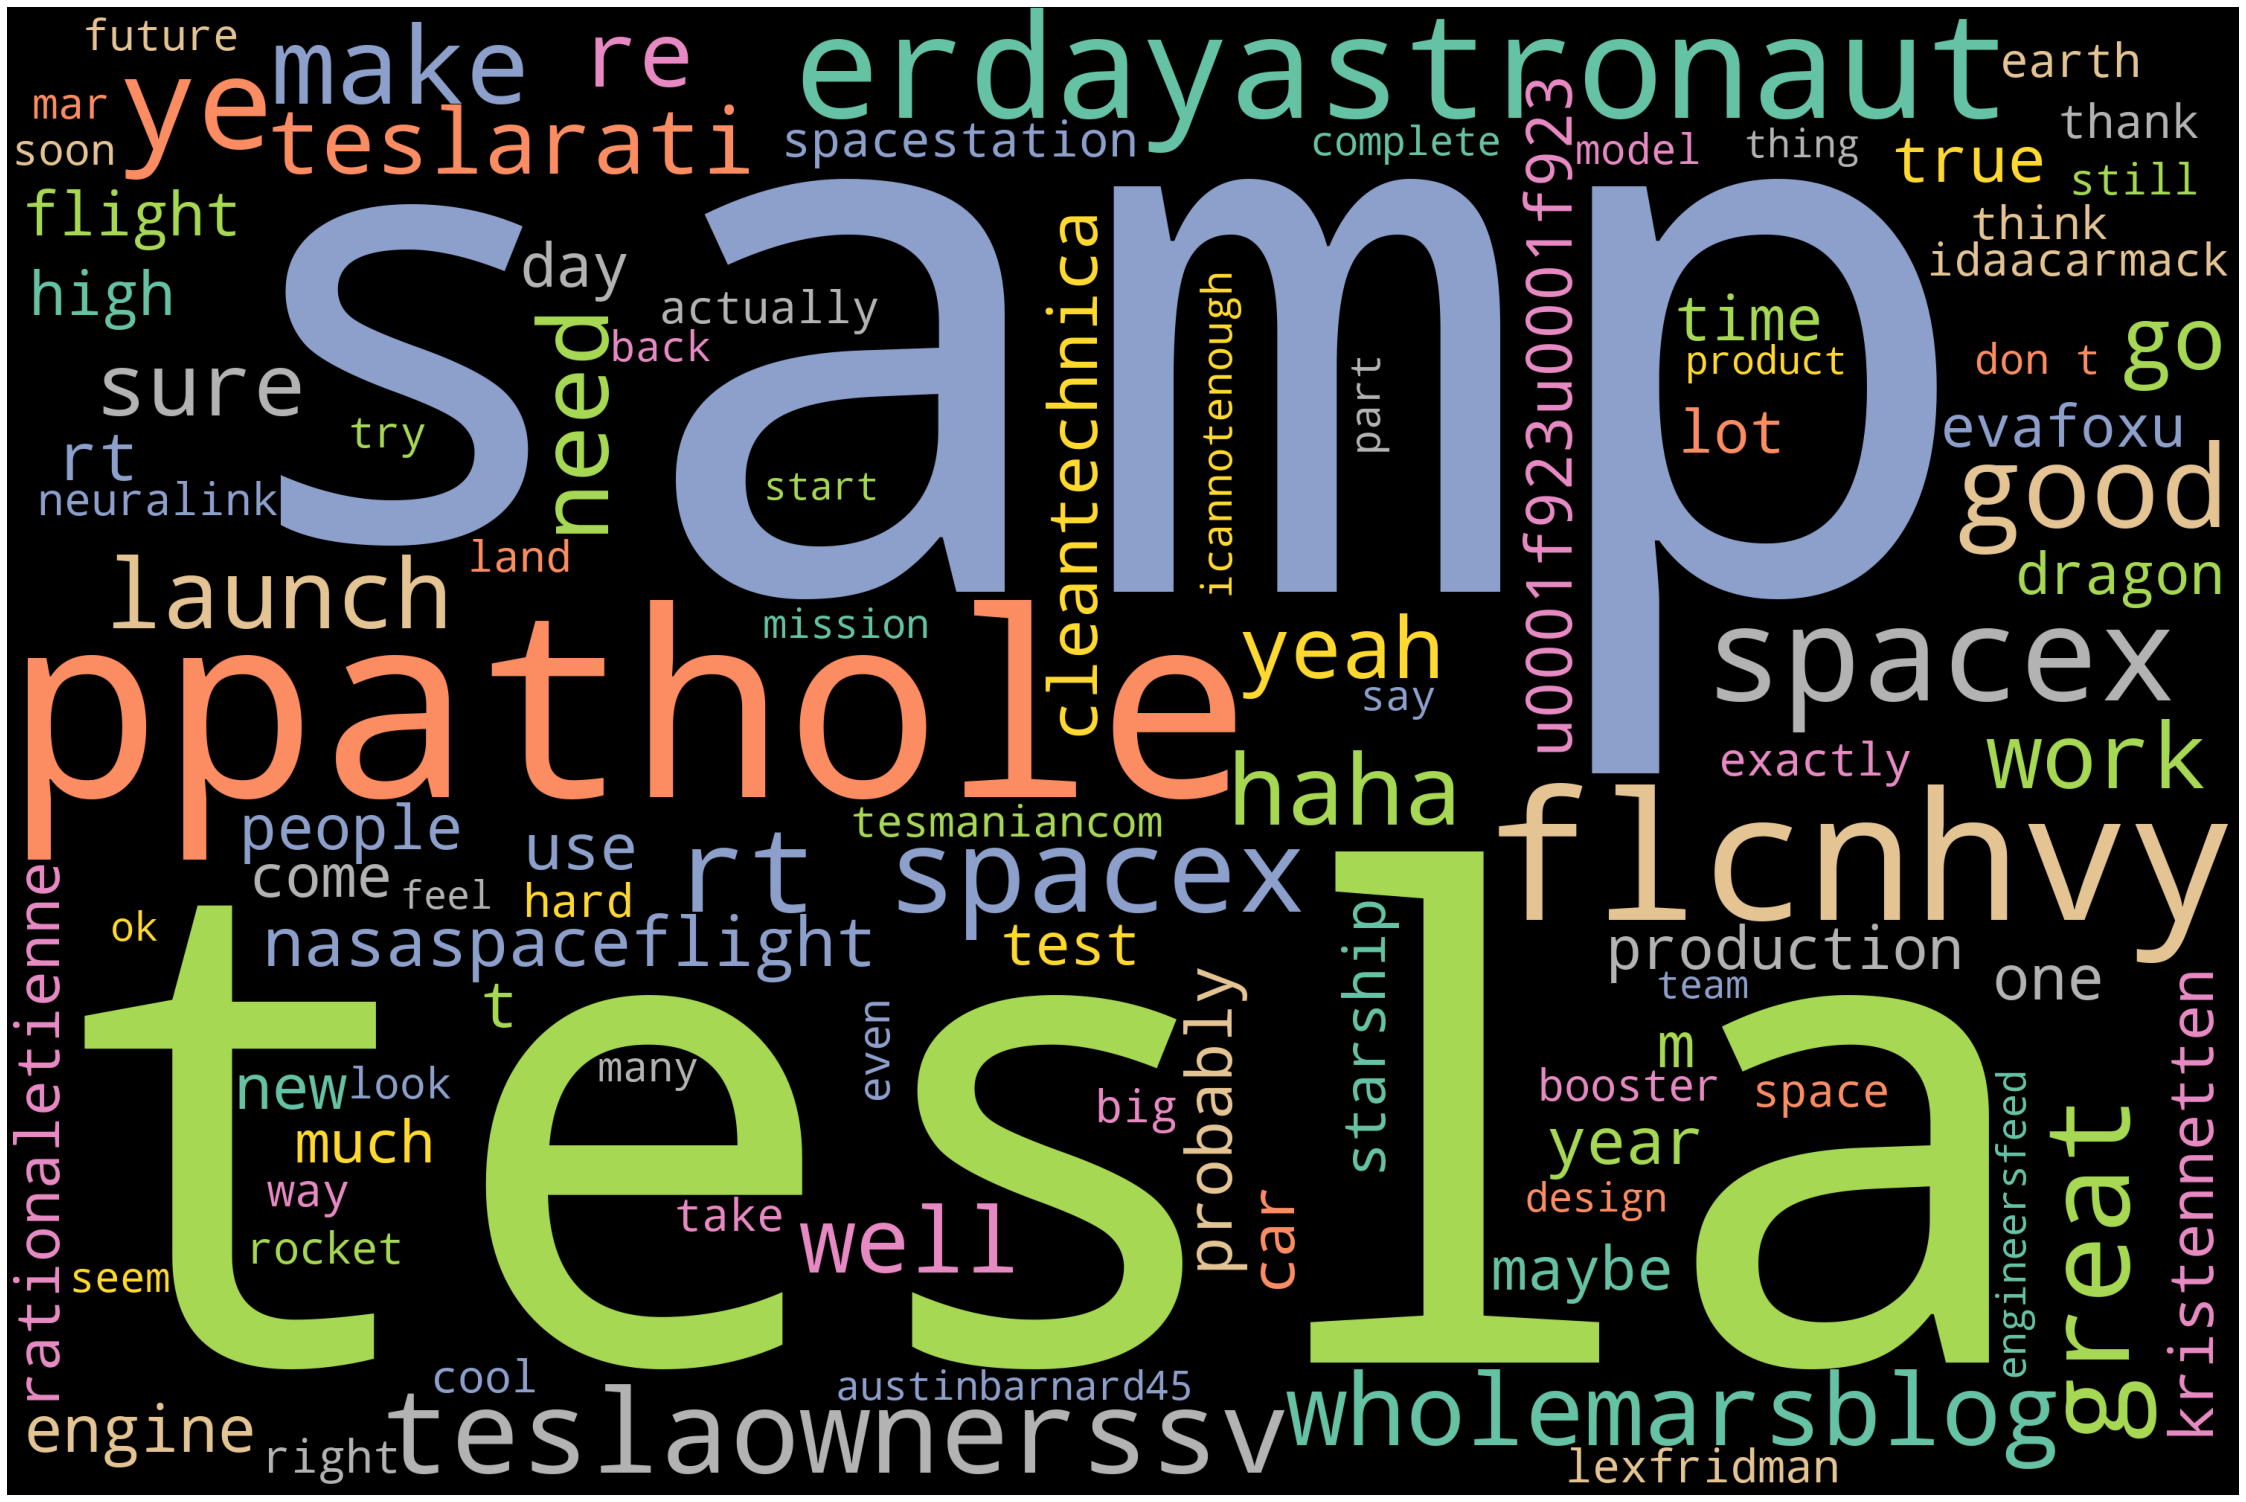

In [34]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tweets)
# Plot
plot_cloud(wordcloud)

In [35]:
wordcloud.to_file("wordcloud.png")

#### Named Entity Recognition

##### Part of speech tagging

In [39]:
##Part Of Speech Tagging

one_block = text1
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [41]:
for token in doc_block[0:20]:
    print(token, token.pos_)

@kunalb11 NOUN
I PRON
� VERB
m VERB
an DET
alien NOUN
@ID_AA_Carmack PRON
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON


In [42]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['level', 'tried', '@Spotify', 'interview', 'underestimated', 'execution', 'year', 'underdoge', 'thought', 'fail', 'https://t.co/zGxJFDzzrM', '@flcnhvy', '@flcnhvy', '@anonyx10', 'Tweets', 'represent', 'world', 'time', 'allocation', 'outcome']


In [43]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,co,250
1,https,249
2,ppathole,96
3,wholemarsblog,63
4,have,48
5,flcnhvy,45
6,launch,43
7,make,33
8,people,32
9,need,31


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

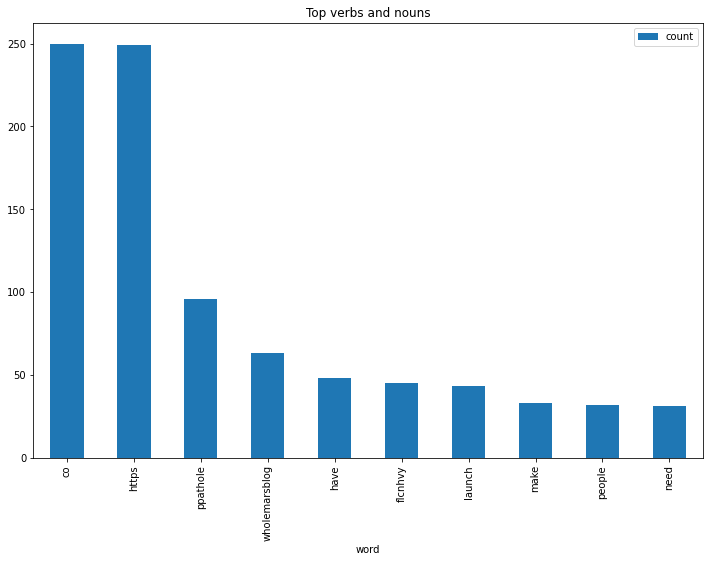

In [44]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

### Emotion Mining

##### Affinn file contains 3300+ words with a polarity score associated with each word used for sentimental analysis

In [45]:
#Sentiment analysis
afinn = pd.read_csv(r'C:\Users\hp\Downloads\Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [46]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


##### splitting into sentences

In [48]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(ElonMusk_Tweets))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won�t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements o

##### saving in a dataframe

In [49]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


##### function to calculate emotion(sentiment analysis for each word)

In [50]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [51]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [52]:
# test that it works
calculate_sentiment(text = 'amazing')

4

##### Applying the function to our dataframe for sentimental analysis

In [53]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [54]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [55]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
157,@harsimranbansal @heydave7 It will most likely...,11,93
808,Might be able to� https://t.co/FB7e5nOq2E @Pri...,11,72
222,"@PPathole @karpathy For a second there, I thou...",11,69
182,"Also, w� https://t.co/IYdKttVsqk @cleantechnic...",12,99
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
710,We just haven�t observed the� https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [56]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.374179
std        2.704916
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [57]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [59]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
149,"@GUNMTLM3 @lexfridman No, but definitely this ...",10,45
157,@harsimranbansal @heydave7 It will most likely...,11,93


In [61]:
sent_df['index']=range(0,len(sent_df))
sent_df.head()

,sentence,sentiment_value,word_count,index
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4


### Visualization for sentimental analysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

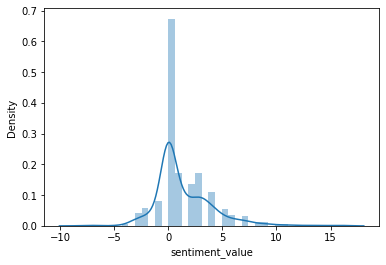

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

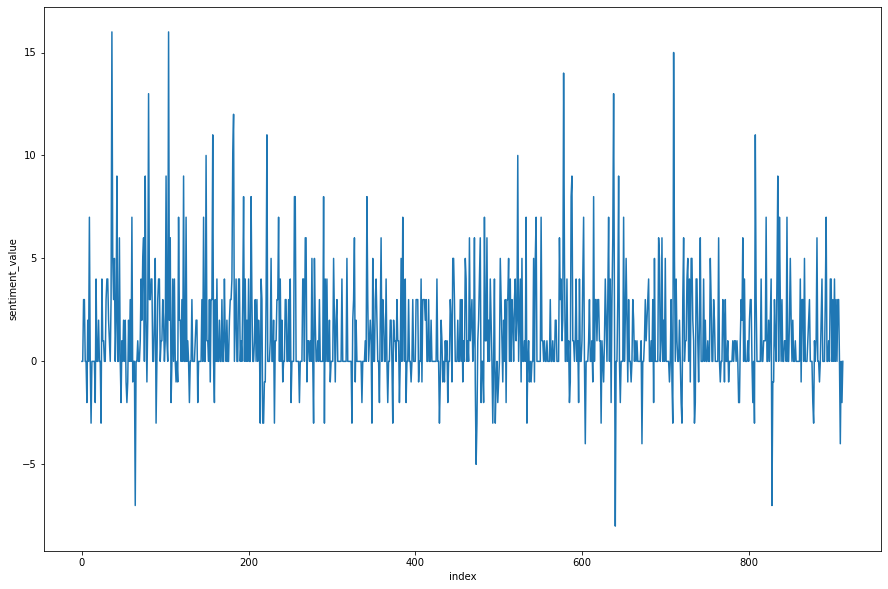

In [63]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

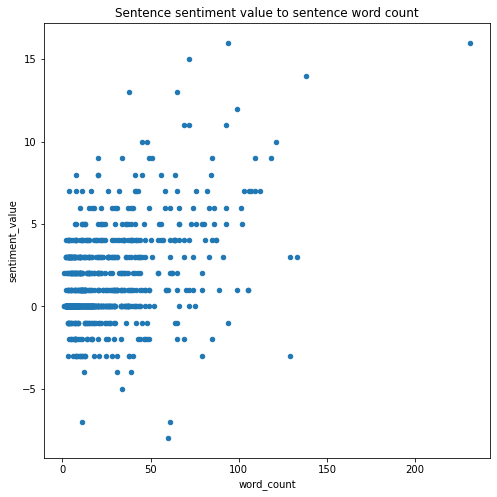

In [64]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [66]:
pip install -U textblob

In [68]:
from textblob import TextBlob

In [70]:
sent_df[['polarity', 'subjectivity']] = sent_df['sentence'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [71]:
TextBlob(sent_df['sentence'][2]).sentiment
sent_df.head()

,sentence,sentiment_value,word_count,index,polarity,subjectivity
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13,0,-0.250000,0.750000
1,Have you tried it?,0,4,1,0.000000,0.000000
2,@joerogan @Spotify Great interview!,3,4,2,1.000000,0.750000
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3,0.300000,0.483333
4,Now on to the next for even more!!,0,8,4,0.390625,0.250000


In [72]:
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [73]:
for index, row in sent_df['sentence'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        sent_df.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        sent_df.loc[index, 'sentiment'] = 'positive'
    else:
        sent_df.loc[index, 'sentiment'] = 'neutral'
    sent_df.loc[index, 'neg'] = neg
    sent_df.loc[index, 'neu'] = neu
    sent_df.loc[index, 'pos'] = pos
    sent_df.loc[index, 'compound'] = comp

In [75]:
x=SentimentIntensityAnalyzer().polarity_scores(sent_df['sentence'][2])

In [78]:
x=SentimentIntensityAnalyzer().polarity_scores(sent_df['sentence'][4])
#{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}
#x['pos']
sent_df['sentence'][4]

'Now on to the next for even more!!'

In [79]:
x

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [80]:
sent_df.head()

,sentence,sentiment_value,word_count,index,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13,0,-0.250000,0.750000,neutral,0.000,1.000,0.000,0.0000
1,Have you tried it?,0,4,1,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,@joerogan @Spotify Great interview!,3,4,2,1.000000,0.750000,positive,0.000,0.406,0.594,0.6588
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3,0.300000,0.483333,positive,0.106,0.505,0.389,0.7650
4,Now on to the next for even more!!,0,8,4,0.390625,0.250000,neutral,0.000,1.000,0.000,0.0000


In [81]:
list_positive = sent_df[sent_df['sentiment']== 'positive']
list_negative = sent_df[sent_df['sentiment']== 'negative']
list_neutral = sent_df[sent_df['sentiment']== 'neutral']
data1 = pd.DataFrame(list_positive, list_negative, list_neutral)

In [82]:
def count_values_in_column(data1,feature):
 total=data1.loc[:,feature].value_counts(dropna=False)
 percentage=round(data1.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(sent_df,'sentiment')

,Total,Percentage
positive,532,58.21
neutral,274,29.98
negative,108,11.82


In [83]:
y = count_values_in_column(sent_df, 'sentiment')
y['Percentage']

positive    58.21
neutral     29.98
negative    11.82
Name: Percentage, dtype: float64

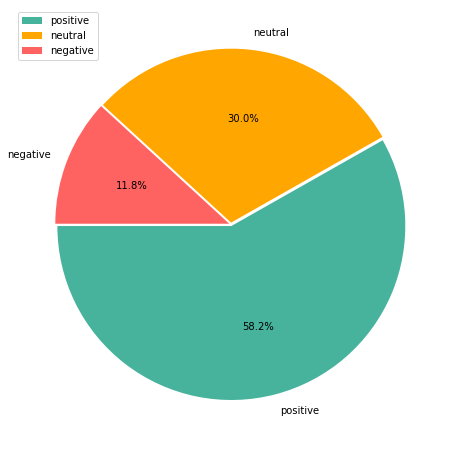

In [84]:
import matplotlib.pyplot as plt
y=count_values_in_column(sent_df, 'sentiment')
y=y['Total']
plt.figure(figsize=(8,8))
mylabels = ['positive', 'neutral','negative']

plt.pie(y, labels = mylabels, startangle=180, colors=['#47B39C', '#ffa600','#ff6361'], autopct='%1.1f%%', explode=[0.01,0.01,0.01])
plt.legend()
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

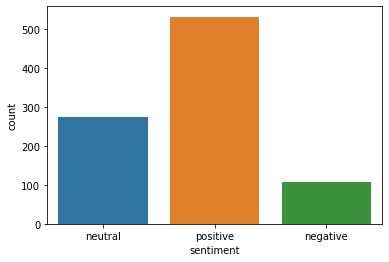

In [85]:
sns.countplot(x = 'sentiment', data = sent_df)

### Inference : As we can see that positive tweets are more compared to negative tweets, we can conclude that Elon is a positive guy